## Showcases hand-written functions to plot distributions and cumulative probabilities

In [1]:
from matplotlib import pyplot as plt
import pydataset as pds
import pandas as pd
import numpy as np
import math
import random
from collections import Counter
from scipy.stats import norm

### Employs tail recursions to calculate a Binomial random variable

In [2]:
# Returns n^m, with tail recursion
def power(n, m, accum=1):
    return power(n, m - 1, accum * n) if m >= 1 else accum

# Returns n!, with tail recursion
def factorial(n, accum=1):
    return factorial(n - 1, accum * n) if n >= 1 else accum

# Returns n! / (k! × (n–k)!)
def binomial_coefficient(n, k):
    return factorial(n) / (factorial(k) * factorial(n - k))

# Returns the probability of k successes, given n total trials and p individual trial probability
def binomial_random_variable(total_trials, successes, success_prob):
    TOTAL_CASES = binomial_coefficient(total_trials, successes)
    COMBINED_SUCCESS_PROB = power(success_prob, successes)
    
    fails = bernoulli_trials - successes
    fail_prob = 1 - bernoulli_prob
    COMBINED_FAIL_PROB = power(fail_prob, fails)
    
    return TOTAL_CASES * COMBINED_SUCCESS_PROB * COMBINED_FAIL_PROB

### Graph [1]: A probability distribution. Attributes a probability Binomial(n,p,k)(x) for each x ∈ [0, n].

In [3]:
bernoulli_trials = 100
bernoulli_prob = 0.3
RANGE = [k for k in range(bernoulli_trials)]
VALUES = [binomial_random_variable(bernoulli_trials, successes, bernoulli_prob) for successes in RANGE]

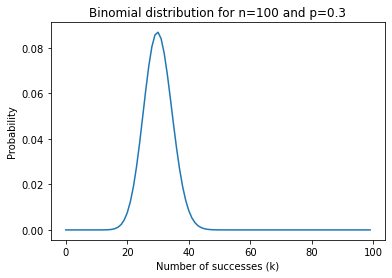

In [4]:
plt.plot(RANGE, VALUES)
plt.xlabel("Number of successes (k)")
plt.ylabel("Probability")
plt.title(f"Binomial distribution for n={bernoulli_trials} and p={bernoulli_prob}")
plt.show()

### Transforms a Binomial(n, k, p) distribution into a Normal(μ = n·p, σ = √n·p·q) distribution.

In [5]:
def binomial_to_normal_approximation(num_trials, prob):
    MU = prob * num_trials
    SIGMA = math.sqrt(prob * (1 - prob) * num_trials)
    return MU, SIGMA

MU, SIGMA = binomial_to_normal_approximation(bernoulli_trials, bernoulli_prob)
print(f"μ = {MU : .2f}, σ = {SIGMA : .2f}")

μ =  30.00, σ =  4.58


### Graph [2]: A probability distribution. Attributes a probability N(μ,σ)(x) for each x ∈ [μ – 5σ, μ + 5σ].

In [6]:
def normal_random_variable(x, mu, sigma):
    BASE = 1 / (math.sqrt(2 * math.pi) * sigma)
    EXP = - (((x - mu) / sigma) ** 2) / 2
    return math.exp(EXP) * BASE

ZSCORE = 5;
RANGE = [x for x in range(int(MU - SIGMA * ZSCORE), int(MU + SIGMA * ZSCORE))]
VALUES = [normal_random_variable(x, MU, SIGMA) for x in RANGE]

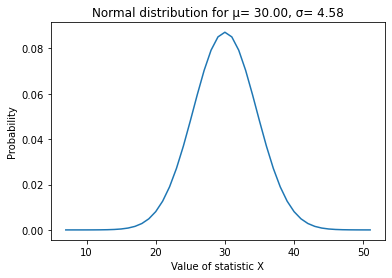

In [7]:
plt.plot(RANGE, VALUES)
plt.xlabel("Value of statistic X")
plt.ylabel("Probability")
plt.title(f"Normal distribution for μ={MU : .2f}, σ={SIGMA : .2f}")
plt.show()

### Retrieves a value's index in log time (efficient)

In [8]:
# Bisection search algorithm for ordered lists, returns value's index
def val_to_index(L, val):
    val = np.round(val, 0)
    return val_to_index_rec(L, val, 0, len(L) - 1)

def val_to_index_rec(L, val, lo, hi):
    if hi >= lo:
        mid = (lo + hi) // 2
        if L[mid] > val:
            return val_to_index_rec(L, val, lo, mid - 1)
        elif L[mid] == val:
            return mid
        else:
            return val_to_index_rec(L, val, mid + 1, hi)
    else:
        return None

### Graph [3]: Given an upper bound for X, what is the cumulative probability?

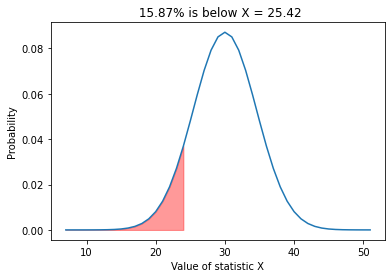

In [9]:
def display_normal_high_X(MU, SIGMA, RANGE, VALUES, hi):
    index = val_to_index(RANGE, hi)
    plt.fill_between(RANGE[:index], VALUES[:index], color='red', alpha=0.4)
    percent = norm.cdf(hi, MU, SIGMA)
    plt.plot(RANGE, VALUES)
    plt.xlabel("Value of statistic X")
    plt.ylabel("Probability")
    plt.title(f"{100 * percent : .2f}% is below X = {hi :.2f}")

display_normal_high_X(MU, SIGMA, RANGE, VALUES, MU - SIGMA)
plt.show()

### Graph [4]: Given a lower bound for X, what is the INVERSE cumulative probability?

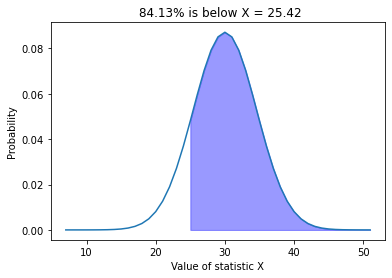

In [10]:
def display_normal_low_X(MU, SIGMA, RANGE, VALUES, lo):
    index = val_to_index(RANGE, lo)
    plt.fill_between(RANGE[index:], VALUES[index:], color='blue', alpha=0.4)
    percent = 1 - norm.cdf(lo, MU, SIGMA)
    plt.plot(RANGE, VALUES)
    plt.xlabel("Value of statistic X")
    plt.ylabel("Probability")
    plt.title(f"{100 * percent : .2f}% is below X = {lo :.2f}")

display_normal_low_X(MU, SIGMA, RANGE, VALUES, MU - SIGMA)
plt.show()

### Graph [5]: Given lower and upper bounds for X, what is the probability of falling WITHIN that range?

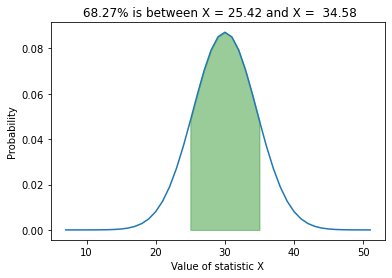

In [11]:
def display_normal_within_low_high_X(MU, SIGMA, RANGE, VALUES, lo, hi):
    index_lo = val_to_index(RANGE, lo)
    index_hi = val_to_index(RANGE, hi)
    plt.fill_between(RANGE[index_lo : index_hi + 1], VALUES[index_lo : index_hi + 1], color='green', alpha=0.4)
    percent = norm.cdf(hi, MU, SIGMA) - norm.cdf(lo, MU, SIGMA)
    plt.plot(RANGE, VALUES)
    plt.xlabel("Value of statistic X")
    plt.ylabel("Probability")
    plt.title(f"{100 * percent : .2f}% is between X = {lo :.2f} and X = {hi : .2f}")

display_normal_within_low_high_X(MU, SIGMA, RANGE, VALUES, MU - SIGMA, MU + SIGMA)
plt.show()

### Graph [6]: Given lower and upper bounds for X, what is the probability of falling OUTSIDE that range?

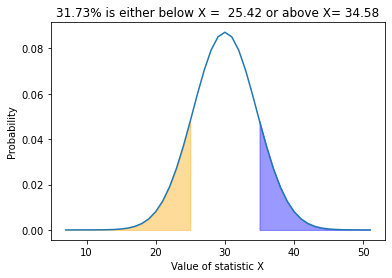

In [12]:
def display_normal_outside_low_high_X(MU, SIGMA, RANGE, VALUES, lo, hi):
    index_lo = val_to_index(RANGE, lo)
    index_hi = val_to_index(RANGE, hi)
    plt.fill_between(RANGE[ : index_lo + 1], VALUES[ : index_lo + 1], color='orange', alpha=0.4)
    plt.fill_between(RANGE[index_hi : ], VALUES[index_hi : ], color='blue', alpha=0.4)
    percent = 1 - norm.cdf(hi, MU, SIGMA) + norm.cdf(lo, MU, SIGMA)
    plt.plot(RANGE, VALUES)
    plt.xlabel("Value of statistic X")
    plt.ylabel("Probability")
    plt.title(f"{100 * percent :.2f}% is either below X = {lo : .2f} or above X={hi : .2f}")
    
display_normal_outside_low_high_X(MU, SIGMA, RANGE, VALUES, MU - SIGMA, MU + SIGMA)
plt.show()

### Graph [7]: Given a cumulative probability, what value of X corresponds to it?

### Notice that the graph is identical to graph [3], that of display_normal_high_X().

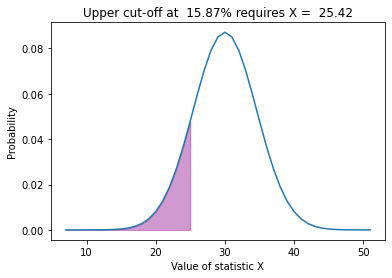

In [13]:
def display_normal_high_P(MU, SIGMA, RANGE, VALUES, percent):
    value = norm.ppf(percent, MU, SIGMA)
    index = val_to_index(RANGE, value)
    plt.fill_between(RANGE[ : index + 1], VALUES[ : index + 1], color='darkmagenta', alpha=0.4)
    plt.plot(RANGE, VALUES)
    plt.xlabel("Value of statistic X")
    plt.ylabel("Probability")
    plt.title(f"Upper cut-off at {100 * percent : .2f}% requires X = {value : .2f}")

display_normal_high_P(MU, SIGMA, RANGE, VALUES, 0.1587)
plt.show()

### Graph [8]: Given an INVERSE cumulative probability, what value of X corresponds to it?

### Notice that the graph is identical to graph [4], that of display_normal_low_X().

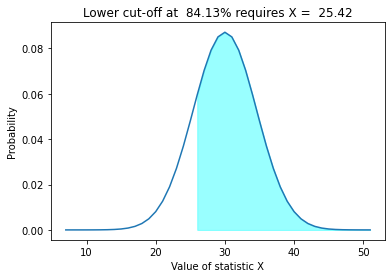

In [14]:
def display_normal_low_P(MU, SIGMA, RANGE, VALUES, percent):
    value = norm.ppf(1 - percent, MU, SIGMA)
    index = val_to_index(RANGE, value)
    plt.fill_between(RANGE[index + 1 : ], VALUES[index + 1 : ], color='aqua', alpha=0.4)
    plt.plot(RANGE, VALUES)
    plt.xlabel("Value of statistic X")
    plt.ylabel("Probability")
    plt.title(f"Lower cut-off at {100 * percent : .2f}% requires X = {value : .2f}")
    
display_normal_low_P(MU, SIGMA, RANGE, VALUES, 0.8413)
plt.show()

### Graph [9]: Given a total two-tailed probability, what lower and upper bounds of X correspond to it?

### Notice that the graph is identical to graph [5], that of display_normal_low_high_X().

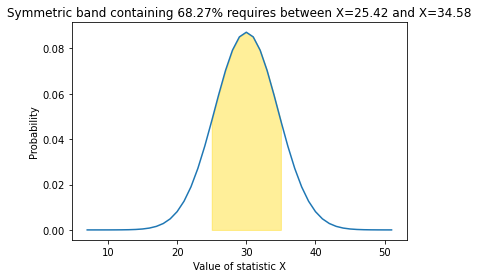

In [15]:
def display_normal_symmetric_P(MU, SIGMA, RANGE, VALUES, percent):
    tailpercent = (1 - percent) / 2
    value_lo = norm.ppf(tailpercent, MU, SIGMA)
    value_hi = norm.ppf(1 - tailpercent, MU, SIGMA)
    index_lo = val_to_index(RANGE, value_lo)
    index_hi = val_to_index(RANGE, value_hi)
    plt.fill_between(RANGE[ index_lo : index_hi + 1], VALUES[ index_lo : index_hi + 1], color='gold', alpha=0.4)
    plt.plot(RANGE, VALUES)
    plt.xlabel("Value of statistic X")
    plt.ylabel("Probability")
    plt.title("Symmetric band containing {:.2f}% requires between X={:.2f} and X={:.2f}".format(100 * percent, value_lo, value_hi))

display_normal_symmetric_P(MU, SIGMA, RANGE, VALUES, 0.6827)
plt.show()